## Titanic Survival Prediction 

Data Information : pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#Importing the necessary libraries 
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
sns.set()

In [2]:
df=pd.read_csv("Titanic.csv")

In [3]:
df.head()

,id,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [4]:
#checking data shape
df.shape

(891, 10)

In [5]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   survived  891 non-null    int64  
 2   pclass    891 non-null    int64  
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [6]:
#checking null values 
df.isnull().sum()

id            0
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      2
dtype: int64

In [7]:
print('Percent of missing "age" records is %.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))


Percent of missing "age" records is 19.87%


- almost 20% of age data is missing 

In [8]:
df.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

In [9]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

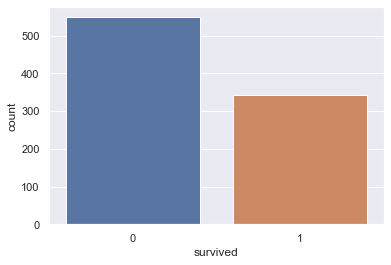

In [10]:
sns.countplot(df["survived"])

In [11]:
counts =pd.DataFrame(df["survived"].value_counts())

In [12]:
counts["Label"] = ["No","Yes"]

In [13]:
counts

,survived,Label
0,549,No
1,342,Yes


([<matplotlib.patches.Wedge at 0x1cda93def40>,
 [Text(-0.4282635655630454, 1.1209773942463013, 'No'),
  Text(0.3925750313068116, -1.0275625746369201, 'Yes')],
 [Text(-0.24982041324510978, 0.6539034799770089, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

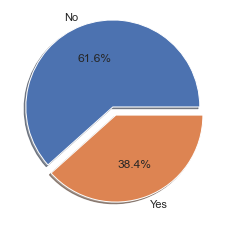

In [14]:
plt.pie(counts["survived"],labels = counts["Label"],autopct='%.1f%%',shadow  = True,explode=[0.1, 0])

## Observation 


- 62% of the people died and 38% people survived

### Subseting data
 

In [15]:
#Subseting data
not_surv= df[df["survived"] == 0]

In [16]:
surv = df[df["survived"] == 1]

In [17]:
not_surv.shape

(549, 10)

In [18]:
surv.shape

(342, 10)

In [19]:
not_surv["sex"].value_counts()

male      468
female     81
Name: sex, dtype: int64

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

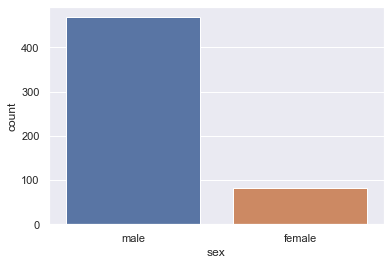

In [20]:
sns.countplot(not_surv["sex"])

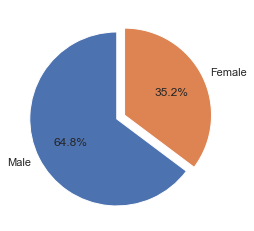

In [21]:
plt.pie(df['sex'].value_counts(),labels=['Male','Female'], startangle=90, 
autopct='%.1f%%', explode=[0.1, 0]);

### Observation
- Majoirty of the male died 

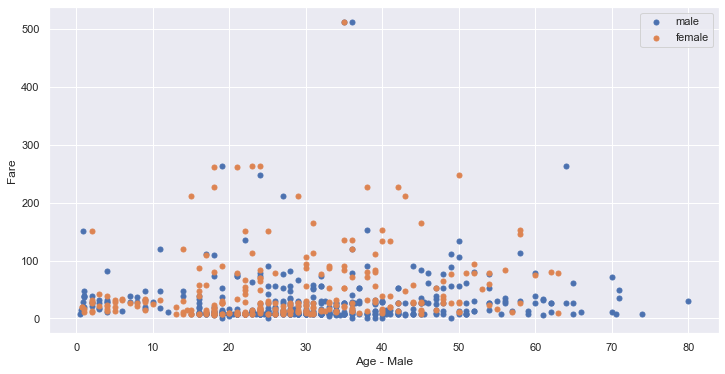

In [22]:
age_m = df[df['sex'] == 'male']['age']
fare_m = df[df['sex'] == 'male']['fare']
age_f = df[df['sex'] == 'female']['age']
fare_f = df[df['sex'] == 'female']['fare']

fig = plt.figure(figsize=(12, 6))
plt.scatter(x=age_m, y=fare_m,s=25)
plt.scatter(x=age_f, y=fare_f,s=25)
plt.xlabel('Age - Male')
plt.ylabel('Fare');
plt.legend(['male', 'female']);

C:\Users\kaund\AppData\Local\Temp\ipykernel_4760\2254988782.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=[1, 2, 3])


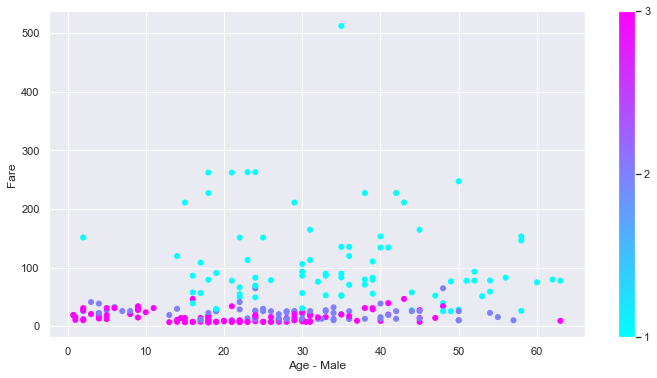

In [23]:
pclass =  df[df['sex'] == 'female']['pclass']

fig = plt.figure(figsize=(12, 6))
plt.scatter(x=age_f, y=fare_f,s=25, c=pclass, cmap='cool')
plt.colorbar(ticks=[1, 2, 3])
plt.xlabel('Age - Male')
plt.ylabel('Fare');

C:\Users\kaund\AppData\Local\Temp\ipykernel_4760\2254988782.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=[1, 2, 3])


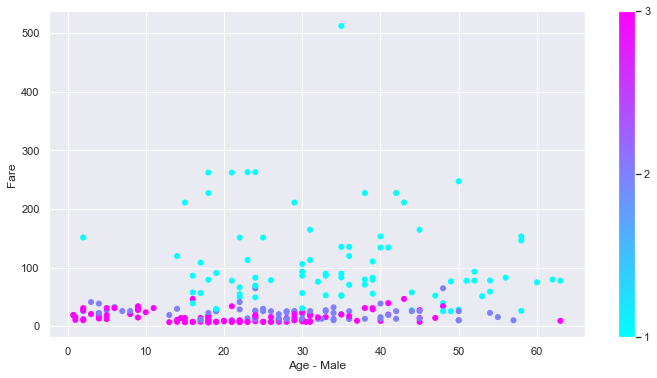

In [24]:
pclass =  df[df['sex'] == 'female']['pclass']

fig = plt.figure(figsize=(12, 6))
plt.scatter(x=age_f, y=fare_f,s=25, c=pclass, cmap='cool')
plt.colorbar(ticks=[1, 2, 3])
plt.xlabel('Age - Male')
plt.ylabel('Fare');

### Observation
- Passengers who paid lower fare appear to have been less likely to survive.

In [25]:
#surving % by class
(surv["pclass"].value_counts(normalize= True)) * 100

1    39.766082
3    34.795322
2    25.438596
Name: pclass, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='count'>

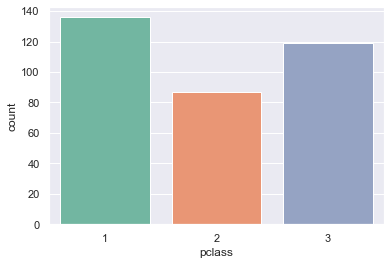

In [26]:
sns.countplot(x='pclass', data=surv, palette='Set2')

In [27]:
#not_survived % by class 
(not_surv["pclass"].value_counts(normalize= True)) * 100

3    67.759563
2    17.668488
1    14.571949
Name: pclass, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='count'>

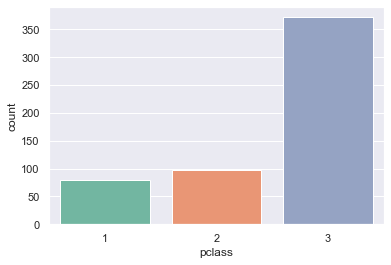

In [28]:
sns.countplot(x='pclass', data=not_surv, palette='Set2')

### Observation
- Most passengers in first class survived unlike those in third class died most 


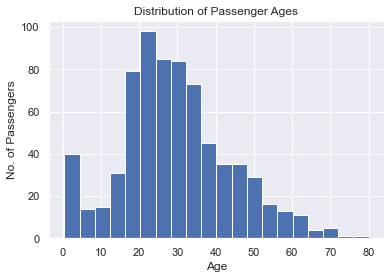

In [29]:
#distribution of passenger’s age
age = df['age']

plt.hist(age, bins=20)

plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.title('Distribution of Passenger Ages')
plt.grid(True);


<AxesSubplot:xlabel='age'>

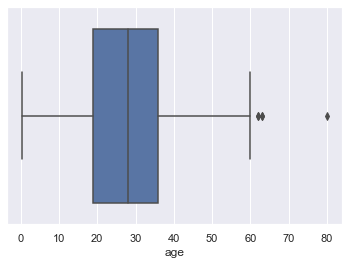

In [30]:
#survive and age 
sns.boxplot(x="age", data =surv)

<AxesSubplot:xlabel='age'>

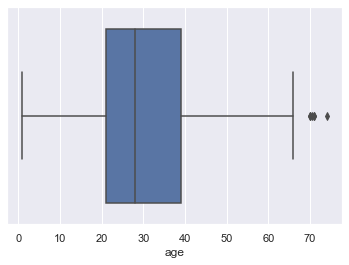

In [31]:
sns.boxplot(x="age", data =not_surv)

## Observation 
- the majority of passangers who survied and not survived were both in the same range of between 20 to 40 
- The oldest saved passanger is of 80

In [32]:
not_surv_male = not_surv[not_surv["sex"] == "male"]
not_surv_female = not_surv[not_surv["sex"] == "female"]

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

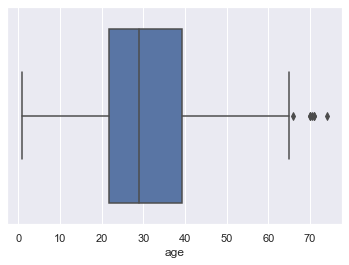

In [33]:
sns.boxplot(not_surv_male["age"])

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

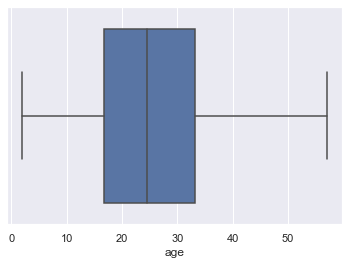

In [34]:
sns.boxplot(not_surv_female["age"])

### Observation
- males who did not survive were between the age of 22-40 and for females they were between the age of 17-34

Boarded passengers grouped by port of embarkation (C, Q , S ):
S    644
C    168
Q     77
Name: embarked, dtype: int64


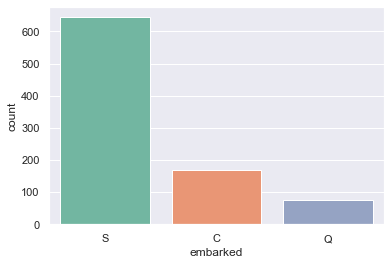

In [35]:
print('Boarded passengers grouped by port of embarkation (C, Q , S ):')
print(df['embarked'].value_counts())
sns.countplot(x='embarked', data=df, palette='Set2')
plt.show()

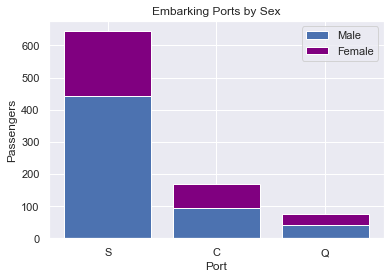

In [36]:
#Let’s compare the ratio of men and woman who boarded the ship from different ports
embarked_m = df[df['sex']=='male']['embarked'].value_counts()
embarked_f = df[df['sex']=='female']['embarked'].value_counts()

plt.bar(x=embarked_m.index, height=embarked_m.values)
plt.bar(x=embarked_f.index, height=embarked_f.values, bottom=embarked_m.values, color='purple')

plt.xlabel('Port')
plt.ylabel('Passengers')
plt.title('Embarking Ports by Sex')
plt.legend(labels=['Male', 'Female']);

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

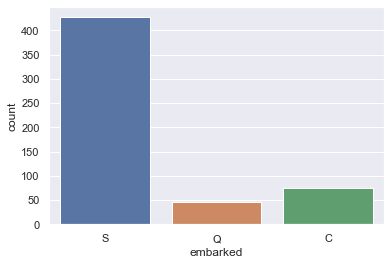

In [37]:
sns.countplot(not_surv["embarked"])

In [38]:
groupby_sb=df.groupby(by="sibsp")

<AxesSubplot:>

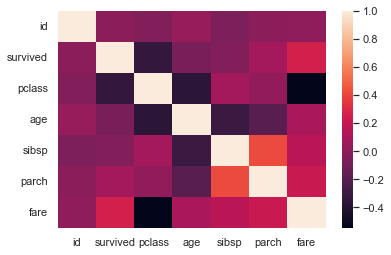

In [39]:
sns.heatmap(df.corr())

## Data preproccessing

In [40]:
df.isnull().sum()

id            0
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      2
dtype: int64

<AxesSubplot:>

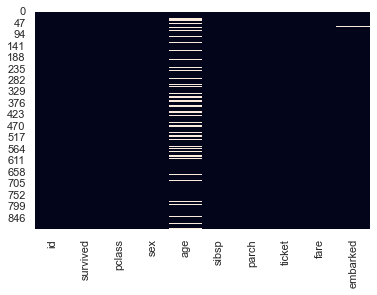

In [41]:
import seaborn as sns 
sns.heatmap(df.isnull(),cbar=False)

In [42]:
((df.isnull().sum()/df.shape[0])*100)

id           0.000000
survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
embarked     0.224467
dtype: float64

## Observation 
- most age values are missing 

In [43]:
# mean age
print('The mean of "age" is %.2f' %(df["age"].mean(skipna=True)))
# median age
print('The median of "age" is %.2f' %(df["age"].median(skipna=True)))

The mean of "age" is 29.70
The median of "age" is 28.00


In [44]:
#filling missing Age with median
df = df.copy()
df["age"].fillna(df["age"].median(skipna=True), inplace=True)


In [45]:
#filling missing embarked 
df["embarked"].fillna(df['embarked'].value_counts().idxmax(), inplace=True)

In [46]:
df.isnull().sum()

id          0
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [47]:
## Removing ticket column from data

df.drop('ticket', inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)

### Data Encoding 

In [48]:
df["sex"].unique() #nominal data

array(['male', 'female'], dtype=object)

In [49]:
df["embarked"].unique() #nominal data

array(['S', 'C', 'Q'], dtype=object)

In [50]:
df=pd.get_dummies(df) #Nominal Data transformation

In [51]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Modeling 

In [53]:
X = df.drop("survived", axis=1) # Feature 
y = df["survived"] # Target

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [56]:
len(X_train)


596

In [57]:
len(X_test)


295

### Logistic Regression

In [58]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaund\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaund\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

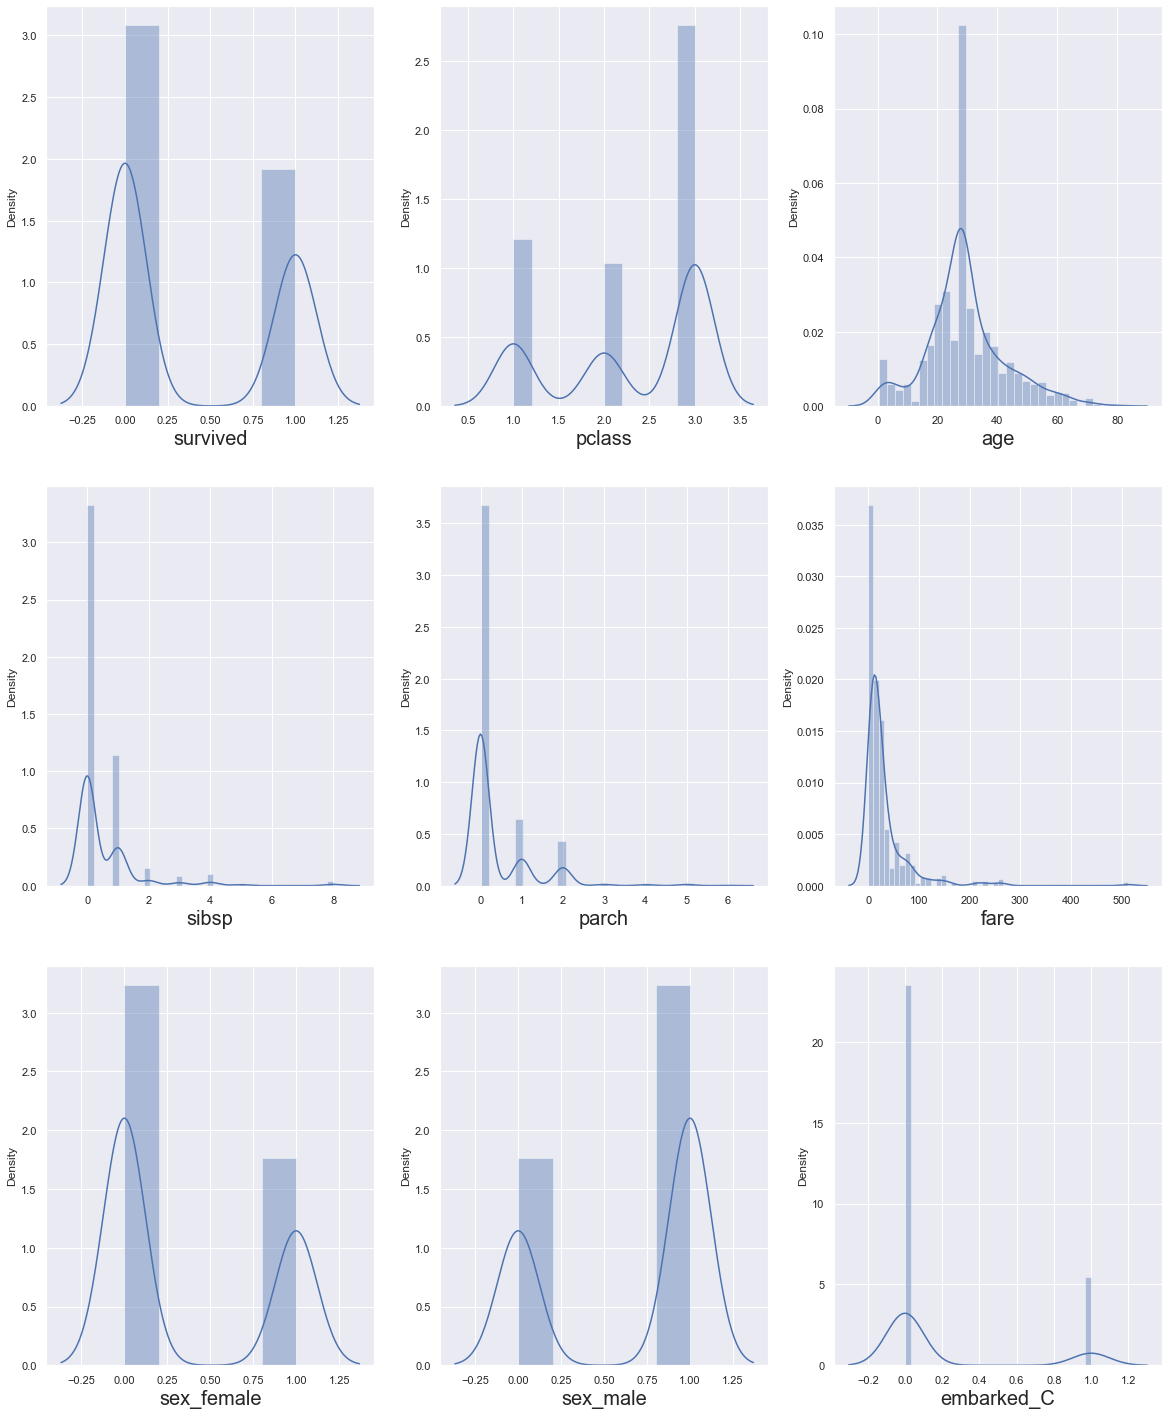

In [61]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler 


In [64]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)# training & testing 

In [67]:
from sklearn.linear_model  import  LogisticRegression


In [69]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred = log_reg.predict(x_test)

In [75]:
confusion_matrix(y_test,y_pred)


array([[119,  26],
       [ 24,  54]], dtype=int64)

In [76]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7757847533632287

In [77]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.675

In [78]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6923076923076923

In [79]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.6835443037974683

In [80]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [81]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7564986737400531

In [82]:
y_pred_prob = log_reg.predict_proba(x_test)

In [83]:
y_pred_prob

array([[0.23730611, 0.76269389],
       [0.86834986, 0.13165014],
       [0.11726019, 0.88273981],
       [0.89479414, 0.10520586],
       [0.43795021, 0.56204979],
       [0.04058202, 0.95941798],
       [0.62708419, 0.37291581],
       [0.7092909 , 0.2907091 ],
       [0.88719858, 0.11280142],
       [0.87477168, 0.12522832],
       [0.84390612, 0.15609388],
       [0.24709725, 0.75290275],
       [0.89961615, 0.10038385],
       [0.81836196, 0.18163804],
       [0.17529397, 0.82470603],
       [0.83791665, 0.16208335],
       [0.94749893, 0.05250107],
       [0.91809399, 0.08190601],
       [0.90276121, 0.09723879],
       [0.62981985, 0.37018015],
       [0.78535864, 0.21464136],
       [0.72969384, 0.27030616],
       [0.29168844, 0.70831156],
       [0.19600263, 0.80399737],
       [0.53701107, 0.46298893],
       [0.10486204, 0.89513796],
       [0.87815749, 0.12184251],
       [0.39182297, 0.60817703],
       [0.94197078, 0.05802922],
       [0.46693894, 0.53306106],
       [0.

In [84]:
y_pred_prob[:,1]

array([0.76269389, 0.13165014, 0.88273981, 0.10520586, 0.56204979,
       0.95941798, 0.37291581, 0.2907091 , 0.11280142, 0.12522832,
       0.15609388, 0.75290275, 0.10038385, 0.18163804, 0.82470603,
       0.16208335, 0.05250107, 0.08190601, 0.09723879, 0.37018015,
       0.21464136, 0.27030616, 0.70831156, 0.80399737, 0.46298893,
       0.89513796, 0.12184251, 0.60817703, 0.05802922, 0.53306106,
       0.55479868, 0.65415211, 0.66803421, 0.09313507, 0.80972357,
       0.07878131, 0.15649094, 0.08335262, 0.81931341, 0.07703855,
       0.40669663, 0.72444252, 0.68687051, 0.13379419, 0.32827844,
       0.31666038, 0.54157678, 0.12271036, 0.35536882, 0.0947307 ,
       0.1470723 , 0.60515182, 0.97068937, 0.32975736, 0.23737217,
       0.10419809, 0.51148087, 0.11786346, 0.88025816, 0.18891325,
       0.08041821, 0.25888035, 0.56609917, 0.2907091 , 0.64977953,
       0.54414047, 0.82293088, 0.7558802 , 0.59511497, 0.83100659,
       0.10433372, 0.00733096, 0.0660973 , 0.25505863, 0.39480

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

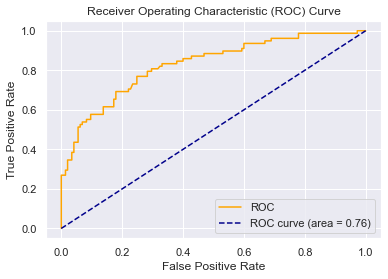

In [87]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       145
           1       0.68      0.69      0.68        78

    accuracy                           0.78       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.78      0.78      0.78       223



- Overall Accuracy is 78% and Precision, Recall and F1-score for predicting not to survive is above 82%  and for survive  is close below 70%

### Random Forest

In [89]:
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7130044843049327

In [91]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24)

In [92]:
clf2.score(x_test,y_test)

0.7174887892376681

In [93]:
rand_clf = RandomForestClassifier(random_state=6)

In [95]:
#tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [96]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [97]:
grid_search.fit(x_train,y_train) 

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


C:\Users\kaund\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [98]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 90}

In [99]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 18,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 6,
 n_estimators = 115,random_state=6)

In [100]:
rand_clf.fit(x_train,y_train)

C:\Users\kaund\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=18, max_features='auto',
                       min_samples_split=6, n_estimators=115, random_state=6)

In [101]:
rand_clf.score(x_test,y_test)

0.7847533632286996